## Configurando o ambiente e lendo os dados

In [700]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 20)

In [701]:
df = pd.read_csv('./databases/teste_indicium_precificacao.csv')

## Entendendo o que os dados querem dizer
- Nessa etapa serão analizados alguns aspectos como o fim de nosso banco de dados, como também o início, limites, seus tipos de dados e uma descrição superficial sobre ele.

In [702]:
df.shape

(48894, 16)

In [703]:
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [704]:
df.columns

Index(['id', 'nome', 'host_id', 'host_name', 'bairro_group', 'bairro',
       'latitude', 'longitude', 'room_type', 'price', 'minimo_noites',
       'numero_de_reviews', 'ultima_review', 'reviews_por_mes',
       'calculado_host_listings_count', 'disponibilidade_365'],
      dtype='object')

In [705]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

De acordo com a análise que foi realizada acima, conseguimos entender melhor como esses dados estão dispostos, mas pode ser notada uma correção necessária para o melhor funcionamento desse dataframe, que é a troca do type Object para ultima_review que funcionaria melhor com o tipo date_time, e iremos alterar posteriormente.

In [706]:
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Conseguimos ver por aqui que o máximo de noites e o preço mostram um comportamento estranho dentro de nosso banco de dados, pois os valores máximos parecem não estar dentro da normalidade esperada para esse tipo de negócio, além disso, o valor mínimo para aluguel está como 0.

## Preparação dos dados

- Drop de colunas e linhas irrelevantes para o negócio
- Identificar colunas duplicadas
- Renomear colunas, se necessário

In [707]:
df.loc[df.duplicated(subset=['id'])]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365


In [708]:
df.loc[df.duplicated(subset=['nome'])]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
329,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73842,-73.95312,Private room,249,3,2,2011-05-12,0.02,28,60
338,84010,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73813,-73.95394,Private room,179,3,13,2019-06-27,0.14,28,81
579,219818,✿✿✿ COUNTRY COTTAGE IN THE CITY✿✿✿,1138692,Keera (Jena),Manhattan,Lower East Side,40.71892,-73.98401,Entire home/apt,199,1,14,2015-07-20,0.15,2,158
660,250537,The Lenox in Harlem,1313306,Yvette,Manhattan,Harlem,40.81122,-73.94279,Entire home/apt,400,5,0,NaN,NaN,2,365
668,253471,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73641,-73.95330,Entire home/apt,199,3,24,2018-11-06,0.32,28,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48683,36382847,Comfort home,266211707,Yan,Brooklyn,Sunset Park,40.64439,-74.01816,Private room,185,1,0,NaN,NaN,2,177
48734,36412461,"Sunny, Cozy, Private Room In The Heart of Bush...",147515897,Flávia,Brooklyn,Bushwick,40.70366,-73.92728,Private room,84,3,0,NaN,NaN,1,28
48758,36420404,Home Sweet Home,273656890,Liana,Manhattan,East Harlem,40.79266,-73.94740,Private room,50,1,0,NaN,NaN,1,81
48790,36427922,Home away from home,238163900,Lucy,Queens,Cambria Heights,40.68557,-73.72731,Private room,50,3,0,NaN,NaN,1,176


In [709]:
df.query('nome == "Superior @ Box House"')

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
320,77765,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73749,-73.95292,Private room,179,3,36,2019-07-01,0.36,28,79
338,84010,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73813,-73.95394,Private room,179,3,13,2019-06-27,0.14,28,81
681,253846,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73731,-73.95450,Private room,179,3,4,2015-12-04,0.05,28,81


In [710]:
df.loc[df.duplicated(subset=['nome', 'room_type', 'price', 'disponibilidade_365'])]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
669,253475,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73794,-73.95254,Entire home/apt,199,3,59,2019-06-24,0.66,28,60
673,253800,Loft Suite @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73730,-73.95323,Entire home/apt,199,3,24,2019-04-25,0.26,28,60
674,253803,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73708,-73.95271,Entire home/apt,199,3,23,2019-06-22,0.26,28,60
675,253806,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73652,-73.95236,Entire home/apt,199,3,43,2019-07-02,0.47,28,60
677,253815,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73784,-73.95324,Entire home/apt,199,3,39,2019-06-29,0.44,28,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45742,34936509,NEAR 5th AVE RENOVATED STUDIO IN BROOKLYN,188212054,Joanna,Brooklyn,Bay Ridge,40.62061,-74.02331,Entire home/apt,245,3,2,2019-06-27,2.00,2,255
45957,35005936,Intimate 1BR in Midtown East by Sonder,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74451,-73.97270,Entire home/apt,162,29,0,NaN,NaN,327,341
46417,35236345,"Cozy house in Woodside, comfortable are!!",200239515,Shogo,Queens,Woodside,40.74239,-73.89454,Private room,35,29,0,NaN,NaN,15,5
46835,35461700,Artsy Private BR in Fort Greene Cumberland,230192510,Zach,Brooklyn,Fort Greene,40.69774,-73.97502,Private room,48,30,0,NaN,NaN,25,341


In [711]:
df = df.loc[~df.duplicated(subset=['nome', 'room_type', 'price', 'calculado_host_listings_count', 'disponibilidade_365'])].reset_index(drop=True).copy()

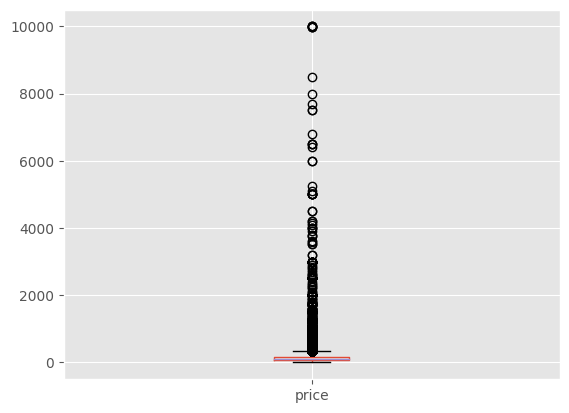

In [712]:
df.boxplot(column='price')
plt.show()

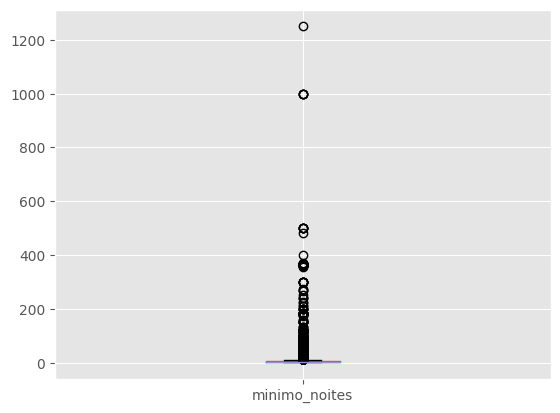

In [713]:
df.boxplot(column='minimo_noites')
plt.show()

De acordo com esses gráficos e adescrição que obtemos do dataframe lá encima, podemos ver que existem outliers nas variáveis 'price' e 'night' que podem afetar a nossa análise e merecem serem verificados mais a fundo para entendermos o motivo disso, além de termos que lidar com alugueis que são iguais a 0.

In [714]:
q1_price = df['price'].quantile(.25)
q3_price = df['price'].quantile(.75)
IQR_price = q3_price - q1_price
print(f'IQR_price = {IQR_price}')

lim_sup_price = q3_price + 1.5 * IQR_price
lim_inf_price = q1_price - 1.5 * IQR_price

print(f'Limite Superior: {lim_sup_price} || Limite Inferior: {lim_inf_price}')
price_selection_above_sup = df['price'] > lim_sup_price
df_above_price = df[price_selection_above_sup]
print(f'O dataset possui {df.shape[0]} conjuntos de dados sendo que {df_above_price.shape[0]} estão acima do limite superior e isso representa um total de {(df_above_price.shape[0] * 100)/df.shape[0]:.2f}%')

IQR_price = 106.0
Limite Superior: 334.0 || Limite Inferior: -90.0
O dataset possui 48828 conjuntos de dados sendo que 2970 estão acima do limite superior e isso representa um total de 6.08%


Agora já conseguimos identificar o padrão da normalização dos dados, e podemos prosseguir com a limpeza desses outliers para que eles não causem qualquer tipo de viés dentro de nossa análise.

### Limpeza do data set

In [716]:
df_clean = df.copy()

In [717]:
df_clean.loc[df_clean['price'] > lim_sup_price, 'price'] = df_clean['price'] / df_clean['minimo_noites']

In [718]:
q1_price = df_clean['price'].quantile(.25)
q3_price = df_clean['price'].quantile(.75)
IQR_price = q3_price - q1_price
print(f'IQR_price = {IQR_price}')

lim_sup_price = q3_price + 1.5 * IQR_price
lim_inf_price = q1_price - 1.5 * IQR_price

print(f'Limite Superior: {lim_sup_price} || Limite Inferior: {lim_inf_price}')
price_selection_above_sup = df_clean['price'] > lim_sup_price
df_above_price = df[price_selection_above_sup]
print(f'O dataset possui {df.shape[0]} conjuntos de dados sendo que {df_above_price.shape[0]} estão acima do limite superior e isso representa um total de {(df_above_price.shape[0] * 100)/df.shape[0]:.2f}%')

IQR_price = 99.0
Limite Superior: 313.5 || Limite Inferior: -82.5
O dataset possui 48828 conjuntos de dados sendo que 1108 estão acima do limite superior e isso representa um total de 2.27%


In [719]:
df_clean.drop(df_clean[df_clean.minimo_noites > 365].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0].index, axis=0, inplace=True)
df_clean.loc[df_clean['price'] > lim_sup_price, 'price'] = df_clean['price'] / df_clean['minimo_noites']
df_clean.drop(df_clean[df_clean.price > lim_sup_price].index, axis=0, inplace=True)
print(f'A quantidade atual de linhas em nosso dataset depois da limpeza é de {df_clean.shape[0]}')

A quantidade atual de linhas em nosso dataset depois da limpeza é de 48077


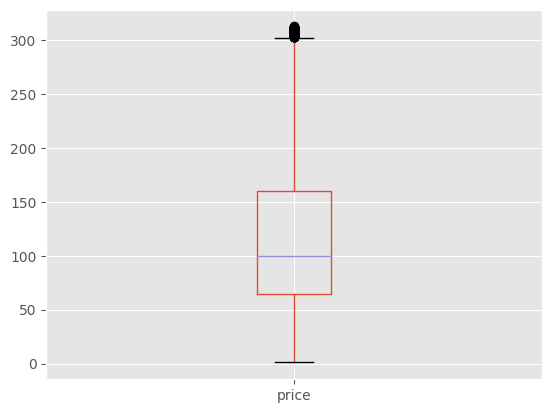

In [720]:
df_clean.boxplot(column='price')
plt.show()

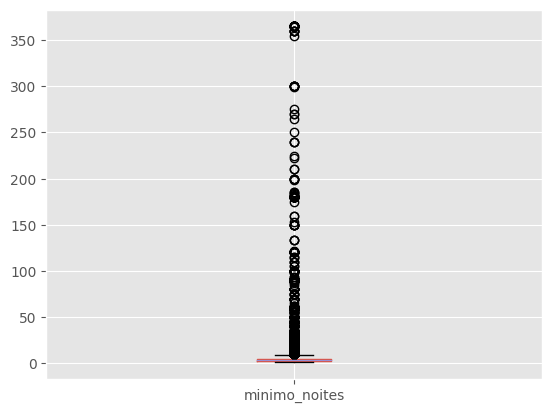

In [721]:
df_clean.boxplot(column='minimo_noites')
plt.show()

Agora que os outliers foram tratados pelo método de retirada, levando em consideração o fato de seu limite superior, e também o fato de que o aluguel é por dia, logo é um pouco sem sentido pensar que os valores ultrapassem o esse montante de limite superior, com uma pesquisa que fiz para localizar os preços atuais, pude notar que o valor médio *mensal* está na casa dos 3.700 U$D

In [722]:
df = df[['host_id', 'nome', 'bairro_group', 'bairro', 'room_type', 'price', 'minimo_noites', 'numero_de_reviews', 'latitude', 'longitude', 'reviews_por_mes', 'disponibilidade_365']].copy()

Agora, para reduzir a quantidade de dados que estamos trabalhando para algo que vá impactar diretamente em nossa análise preditiva, reduzi a quantidade de colunas do nosso dataframe, levando em conta alguns motivos principais. Por exemplo, alguns itens são completamente descartáveis para a nossa análise, como por exemplo, o ID do anúncio, isso porque, seguindo a lógica de negócio, pois o usuário não vai interagir diretamente com esse tipo de dado para entender se deseja alugar o local ou não, também, não desejamos saber a quantidade de listagens por host nessa análise. Os dados escolhidos foram a localização tanto nominal qunato numeral, o mínimo de noites que se deve ficar, pois o anunciante pode optar por valores diferentes, se o a quantidade de noites foir maior ou menor, a quantidade de reviews totais e mensais, pois seguindo a lógica atual do negócio, as pessoas buscam antes saber sobre o local para poder alugar, e se as reviews forem boas, com certeza, o host irá se sentir à vontade para colocar um preço maior, e também a sua disponibilidade total, seguindo a lógica da procura e oferta, se não tem muitos dias disponíveis para locação, talvez o local seja muito procurado, e seguindo isso, o produto tende a ficar mais caro. Além disso tudo, também deixei a variável 'price' que é o que desejamos prever com esse modelo.

In [723]:
df.head()

,host_id,nome,bairro_group,bairro,room_type,price,minimo_noites,numero_de_reviews,latitude,longitude,reviews_por_mes,disponibilidade_365
0,2845,Skylit Midtown Castle,Manhattan,Midtown,Entire home/apt,225,1,45,40.75362,-73.98377,0.38,355
1,4632,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,Private room,150,3,0,40.80902,-73.94190,NaN,365
2,4869,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,40.68514,-73.95976,4.64,194
3,7192,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,Entire home/apt,80,10,9,40.79851,-73.94399,0.10,0
4,7322,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,Entire home/apt,200,3,74,40.74767,-73.97500,0.59,129


In [724]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48828 entries, 0 to 48827
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   host_id              48828 non-null  int64  
 1   nome                 48813 non-null  object 
 2   bairro_group         48828 non-null  object 
 3   bairro               48828 non-null  object 
 4   room_type            48828 non-null  object 
 5   price                48828 non-null  int64  
 6   minimo_noites        48828 non-null  int64  
 7   numero_de_reviews    48828 non-null  int64  
 8   latitude             48828 non-null  float64
 9   longitude            48828 non-null  float64
 10  reviews_por_mes      38808 non-null  float64
 11  disponibilidade_365  48828 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 4.5+ MB


In [725]:
mask = df['reviews_por_mes'].isnull()

In [726]:
df[mask]

,host_id,nome,bairro_group,bairro,room_type,price,minimo_noites,numero_de_reviews,latitude,longitude,reviews_por_mes,disponibilidade_365
1,4632,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,Private room,150,3,0,40.80902,-73.94190,NaN,365
18,17985,Huge 2 BR Upper East Cental Park,Manhattan,East Harlem,Entire home/apt,190,7,0,40.79685,-73.94872,NaN,249
25,26394,Magnifique Suite au N de Manhattan - vue Cloitres,Manhattan,Inwood,Private room,80,4,0,40.86754,-73.92639,NaN,0
35,7355,Clean and Quiet in Brooklyn,Brooklyn,Bedford-Stuyvesant,Private room,35,60,0,40.68876,-73.94312,NaN,365
37,45445,Country space in the city,Brooklyn,Flatbush,Private room,150,1,0,40.63702,-73.96327,NaN,365
...,...,...,...,...,...,...,...,...,...,...,...,...
48823,8232441,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,40.67853,-73.94995,NaN,9
48824,6570630,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,Private room,40,4,0,40.70184,-73.93317,NaN,36
48825,23492952,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,Entire home/apt,115,10,0,40.81475,-73.94867,NaN,27
48826,30985759,43rd St. Time Square-cozy single bed,Manhattan,Hell's Kitchen,Shared room,55,1,0,40.75751,-73.99112,NaN,2


In [727]:
df = df.fillna(0)

In [728]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48828 entries, 0 to 48827
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   host_id              48828 non-null  int64  
 1   nome                 48828 non-null  object 
 2   bairro_group         48828 non-null  object 
 3   bairro               48828 non-null  object 
 4   room_type            48828 non-null  object 
 5   price                48828 non-null  int64  
 6   minimo_noites        48828 non-null  int64  
 7   numero_de_reviews    48828 non-null  int64  
 8   latitude             48828 non-null  float64
 9   longitude            48828 non-null  float64
 10  reviews_por_mes      48828 non-null  float64
 11  disponibilidade_365  48828 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 4.5+ MB


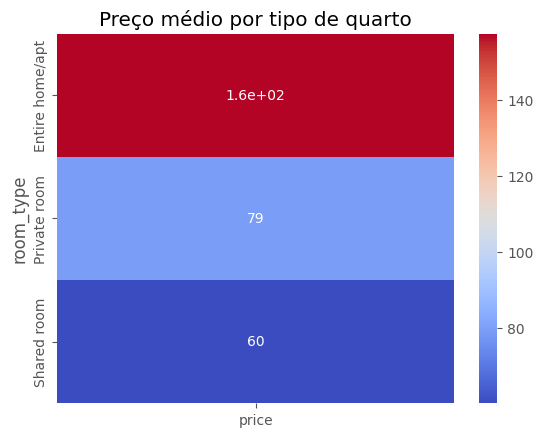

In [729]:
heatmap_data = df_clean.groupby('room_type')['price'].mean().reset_index()
heatmap_p = heatmap_data.pivot_table(index='room_type', values='price')
sns.heatmap(heatmap_p, annot=True, cmap='coolwarm')
plt.title('Preço médio por tipo de quarto')
plt.show()

In [730]:
dumies = pd.get_dummies(df_clean.room_type)
dumies = dumies.astype(int)
dumies.head(5)

,Entire home/apt,Private room,Shared room
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [731]:
df_clean = pd.concat([df_clean, dumies],axis='columns')
df_clean

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,Entire home/apt,Private room,Shared room
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355,1,0,0
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,NaN,1,365,0,1,0
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194,1,0,0
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0,1,0,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,2019-06-22,0.59,1,129,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48823,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,NaN,NaN,2,9,0,1,0
48824,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,NaN,NaN,2,36,0,1,0
48825,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,NaN,NaN,1,27,1,0,0
48826,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,NaN,NaN,6,2,0,0,1


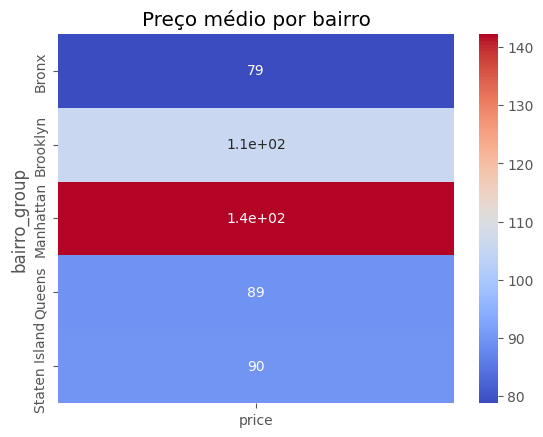

In [732]:
heatmap_data = df_clean.groupby('bairro_group')['price'].mean().reset_index()
heatmap_p = heatmap_data.pivot_table(index='bairro_group', values='price')
sns.heatmap(heatmap_p, annot=True, cmap='coolwarm')
plt.title('Preço médio por bairro')
plt.show()

Após realizar as análises do modelo preditivo, cheguei a conclusão que realizar a utilização das variáveis de tipo de locação seriam interessantes para ajustá-lo, e realmente seu MAE foi de 51 para 38 U$D/noite, entretanto, tentei fazer o mesmo para o bairro, substituindo a latitude e longitude por ele, mas o mesmo não funcionou, tendo uma alteração irrelevante para que a complexidade do dataframe fosse aumentada.

## Entendendo as características de nossos dados

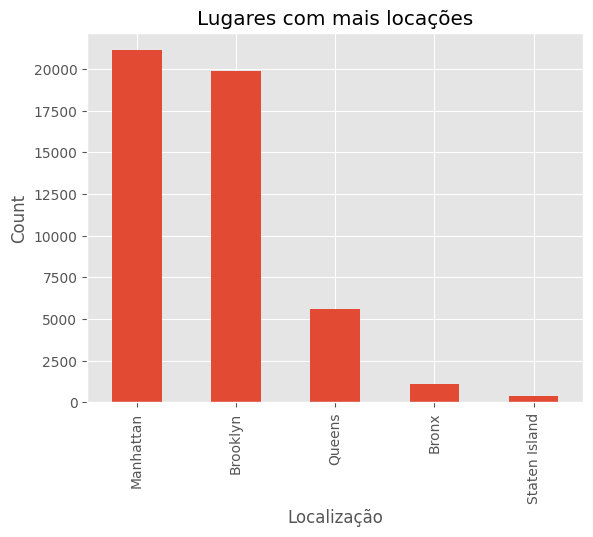

In [733]:
ax = df_clean['bairro_group'].value_counts().plot(kind='bar', title='Lugares com mais locações')
ax.set_xlabel('Localização')
ax.set_ylabel('Count')
plt.show()

De acordo com esse gráfico, podemos notar que  Manhattan e Brooklyn são os locais que tem a maior quantidade de lugar para aluguel.

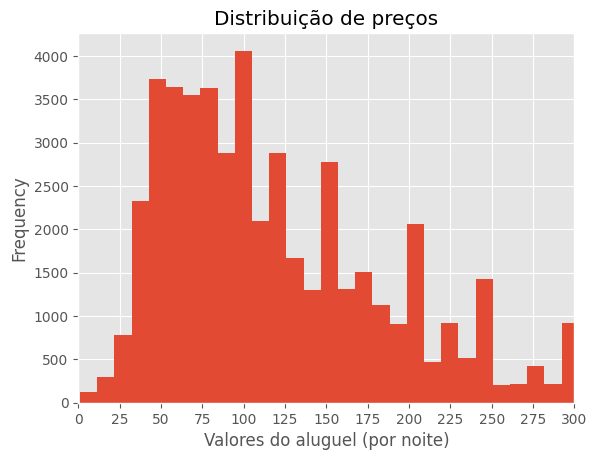

In [734]:
ax = df_clean['price'].plot(kind='hist', bins=30, title='Distribuição de preços')
ax.set_xlim([0, 300])  
plt.xticks(range(0, 301, 25))
ax.set_xlabel('Valores do aluguel (por noite)')
plt.show()

Com o auxílio desse histograma, podemos perceber que os preços tem uma tendência em se localizar entre 0 e 400, com a presença de alguns outliers dentro da análise, como por exemplo, temos uma barra nacendo a partir do valor 2000 e um pouco antes de 1600, mas a frequência se localiza mais dentro da primeira parte do gráfico, mais precisamente entre [0-400].

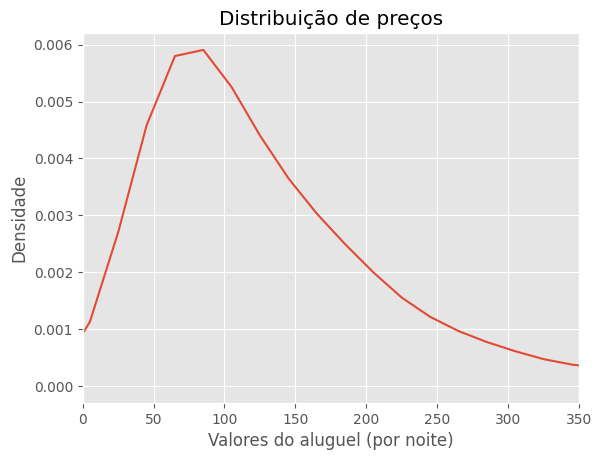

In [735]:
ax = df['price'].plot(kind='kde', title='Distribuição de preços')
ax.set_xlim([0, 350])  
ax.set_xlabel('Valores do aluguel (por noite)')
ax.set_ylabel('Densidade')
plt.show()



Com esse gráfico de densidade, mais detalhado nos valores que desejamos visualizar, podemos ver que de fato, os valores ficam entorno dessa área e seu ápice fica no valor de 100 U$D.

## Relações entre as principais características

- Para um melhor entendimento, vamos explorar por aqui o que pode levar de fato o preço a variar, com algumas das características que foram supracitadas como relacionais para o aumento ou diminuição do preço, vamos começar fazendo uma clusterização entre o valor de aluguel e a quantidade mínima de dias que deve ficar.

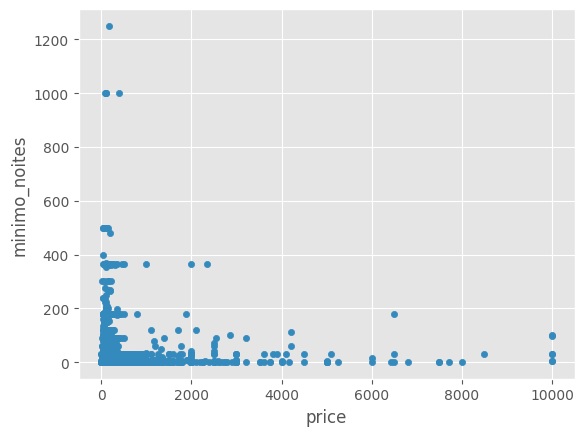

In [736]:
df.plot(kind='scatter',x='price', y='minimo_noites')
plt.show()

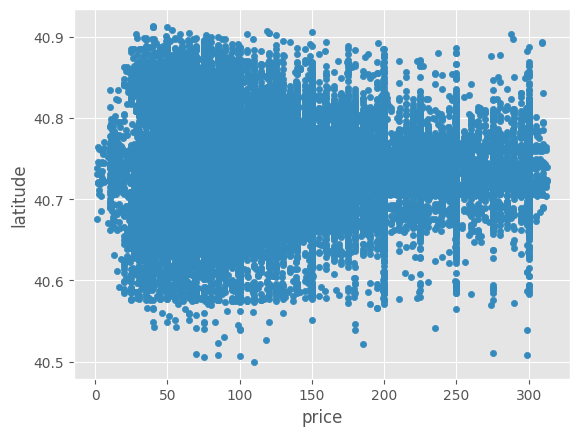

In [737]:
df_clean.plot(kind='scatter',x='price', y='latitude')
plt.show()

Nesse gráfico acima, podemos identificar a possível presença de outliers, então por hora, vamos deixar de lado a análise deles, focando apenas em valores mais próximos de onde os outros estão agrupados.

Nesse gráfico, apesar de podermos verificar que existe uma grande tendência para que o número de noites defina qual o valor a ser pago pelo hóspede ou não, pois tem um agrupamento maior na parte onde as noites se aproximam de valores menores, em conjunto com os preços também se aproximando desses valores.

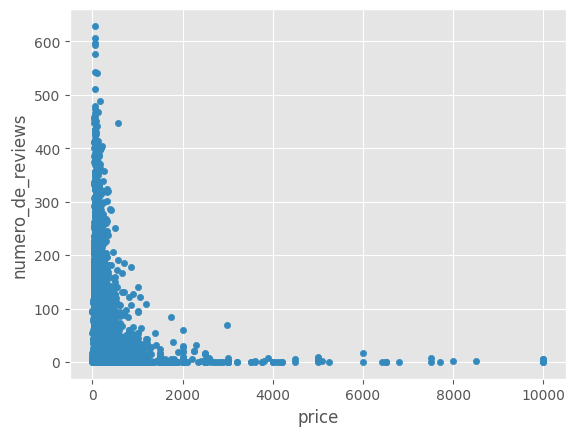

In [738]:
df.plot(kind='scatter',x='price', y='numero_de_reviews')
plt.show()

Nesse outro gráfico, podemos perceber que não necessariamente a quantidade de reviews vai influenciar a variação do preço de forma positiva, a uma primeira  vista superficial, o gráfico demonstra que dentro da primeira parte do gráfico é a que a quantidade de reviews é maior.

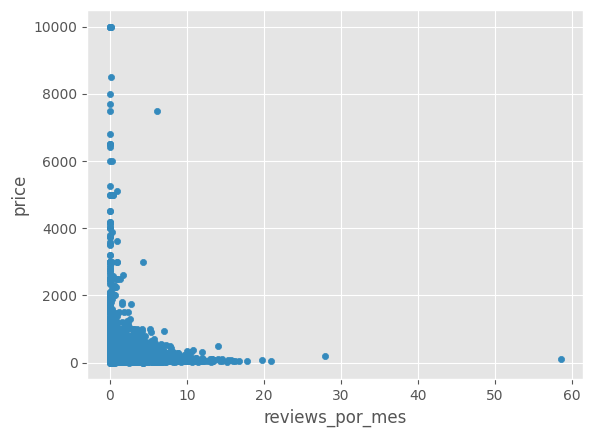

In [739]:
df.plot(kind='scatter',y='price', x='reviews_por_mes')
plt.show()

A mesma tendência da quantidade de reviews também funciona para a quantidade de reviews por mês, quanto mais se tem reviews em um mês, mais o valor do aluguel é barato.

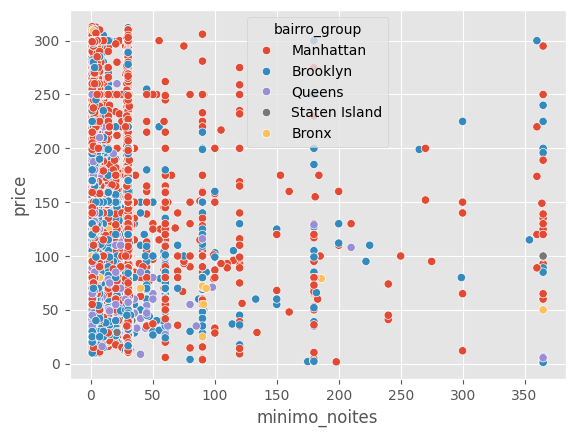

In [740]:
sns.scatterplot(y='price', x='minimo_noites', hue='bairro_group', data = df_clean)
plt.show()

Por esse gráfico, podemos perceber que a tendência é que quando a quantidade minima de noites que deve passar é maior, mais barata é a tendência do valor do aluguel.

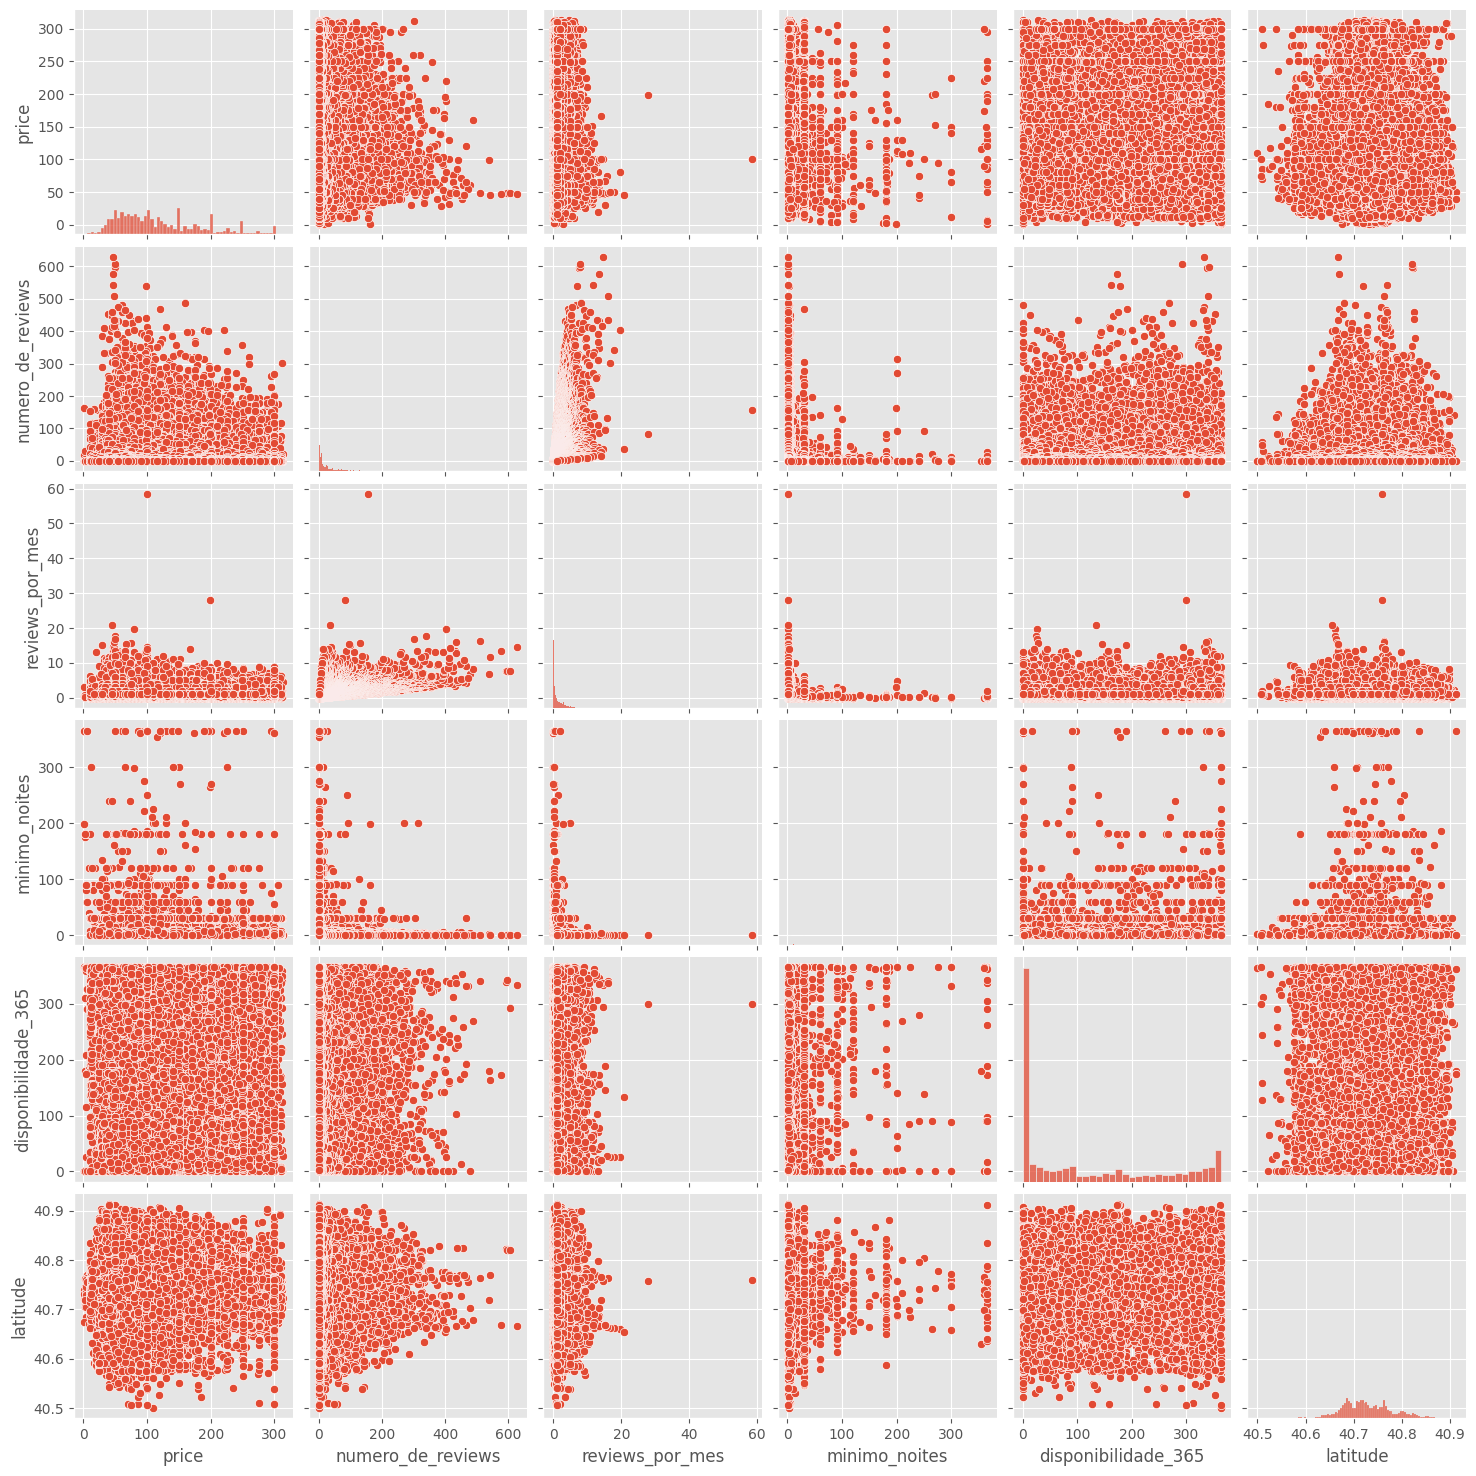

In [741]:
sns.pairplot(df_clean, vars=['price', 'numero_de_reviews', 'reviews_por_mes', 'minimo_noites', 'disponibilidade_365', 'latitude'])
plt.show()

Por esses gráficos, eu não consigo verificar uma correlação entre a variação das variáveis que pensei que alterassem o preço e o valor dele.

In [742]:
df_cov = df_clean[['price', 'numero_de_reviews', 'minimo_noites', 'host_id', 'disponibilidade_365', 'latitude', 'longitude', 'Entire home/apt', 'Private room', 'Shared room']].corr()

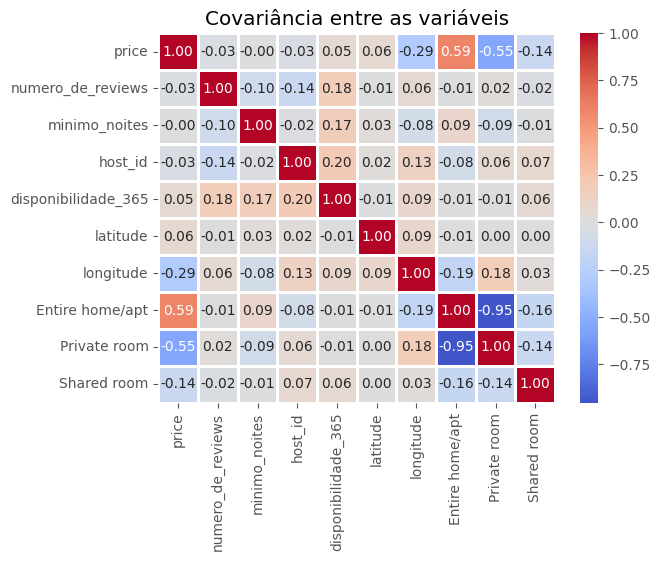

In [743]:
sns.heatmap(df_cov, annot=True, cmap="coolwarm", center=0, linewidths=1, fmt='.2f')
plt.title('Covariância entre as variáveis')
plt.show()

Seguindo a lógica desse mapa de calor, as variáveis que tem mais influencia no valor de algum aluguel se tratam de 'minimo_noite', 'host_id' e 'disponibilidade_365'

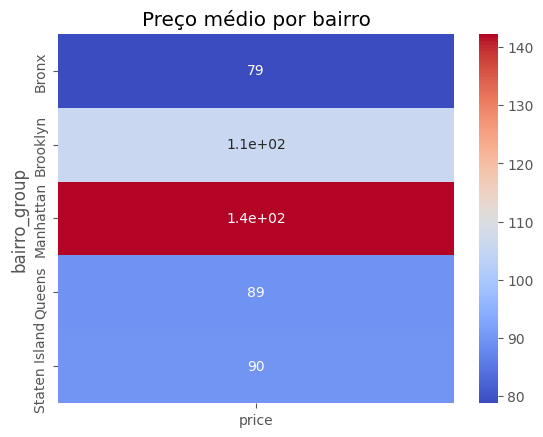

In [744]:
heatmap_data = df_clean.groupby('bairro_group')['price'].mean().reset_index()
heatmap_p = heatmap_data.pivot_table(index='bairro_group', values='price')
sns.heatmap(heatmap_p, annot=True, cmap='coolwarm')
plt.title('Preço médio por bairro')
plt.show()

Por essa análise, o bairro pode sim definir o preço do aluguel de uma certa localidade.

In [745]:
df_clean = df_clean[['host_id', 'bairro_group', 'price', 'minimo_noites', 'numero_de_reviews', 'latitude', 'longitude', 'reviews_por_mes', 'disponibilidade_365', 'Entire home/apt', 'Private room', 'Shared room']].copy()
df_clean

,host_id,bairro_group,price,minimo_noites,numero_de_reviews,latitude,longitude,reviews_por_mes,disponibilidade_365,Entire home/apt,Private room,Shared room
0,2845,Manhattan,225.0,1,45,40.75362,-73.98377,0.38,355,1,0,0
1,4632,Manhattan,150.0,3,0,40.80902,-73.94190,NaN,365,0,1,0
2,4869,Brooklyn,89.0,1,270,40.68514,-73.95976,4.64,194,1,0,0
3,7192,Manhattan,80.0,10,9,40.79851,-73.94399,0.10,0,1,0,0
4,7322,Manhattan,200.0,3,74,40.74767,-73.97500,0.59,129,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48823,8232441,Brooklyn,70.0,2,0,40.67853,-73.94995,NaN,9,0,1,0
48824,6570630,Brooklyn,40.0,4,0,40.70184,-73.93317,NaN,36,0,1,0
48825,23492952,Manhattan,115.0,10,0,40.81475,-73.94867,NaN,27,1,0,0
48826,30985759,Manhattan,55.0,1,0,40.75751,-73.99112,NaN,2,0,0,1


E aqui também nos mostra que o tipo de local que se está alugando também tem uma influencia no preço do aluguel.

In [746]:
df.describe()

,host_id,price,minimo_noites,numero_de_reviews,latitude,longitude,reviews_por_mes,disponibilidade_365
count,4.882800e+04,48828.000000,48828.000000,48828.000000,48828.000000,48828.000000,48828.000000,48828.000000
mean,6.759085e+07,152.727820,7.027996,23.297022,40.728942,-73.952185,1.092024,112.692492
std,7.860404e+07,240.293165,20.520391,44.573276,0.054544,0.046132,1.597962,131.547972
min,2.438000e+03,0.000000,1.000000,0.000000,40.499790,-74.244420,0.000000,0.000000
25%,7.820478e+06,69.000000,1.000000,1.000000,40.690040,-73.983080,0.040000,0.000000
50%,3.076931e+07,106.000000,3.000000,5.000000,40.723055,-73.955680,0.370000,45.000000
75%,1.074344e+08,175.000000,5.000000,24.000000,40.763130,-73.936280,1.590000,226.000000
max,2.743213e+08,10000.000000,1250.000000,629.000000,40.913060,-73.712990,58.500000,365.000000


Verificar os maiores preços, para identificar algum padrão nos nomes

In [747]:
df_clean.to_csv('./databases/clean_teste_indicium_precificacao.csv', index=False)